In [19]:
import numpy as np
import json
from pycocotools.coco import COCO
import cv2
import matplotlib.pyplot as plt
import pickle

In [4]:
coco_train_path = '../Data/COCO17/annotations/instances_train2017.json'
coco_val_path = '../Data/COCO17/annotations/instances_val2017.json'

In [5]:
train_data = COCO(coco_train_path)
val_data = COCO(coco_val_path)

loading annotations into memory...
Done (t=7.26s)
creating index...
index created!
loading annotations into memory...
Done (t=0.24s)
creating index...
index created!


In [6]:
img_ids = train_data.getImgIds()

In [21]:
def pack_seg_out(seg):
    new_seg_out = {
        'packed_masks': np.packbits(seg, axis=1),
        'original_shape': seg.shape,
        'scores': None,
    }
    return new_seg_out

In [22]:
img_info = train_data.loadImgs(img_ids)
for img_id in img_ids:
    anns = train_data.loadAnns(train_data.getAnnIds(imgIds=img_id))
    img_info = train_data.loadImgs([img_id])[0]
    h, w = img_info['width'], img_info['height']
    masks = []
    if anns:
        for i in range(len(anns)):
            masks.append(train_data.annToMask(anns[i]) * 255)
    if len(masks) > 0:
        masks = np.stack(masks)
        seg_packed = pack_seg_out(masks)
        with open(f'../Data/COCO17/obj_seg/{img_id}.pkl', 'wb') as f:
            pickle.dump(seg_packed, f)
        print(f'Image {img_id} processed and saved.')    

Image 391895 processed and saved.
Image 522418 processed and saved.
Image 184613 processed and saved.
Image 318219 processed and saved.
Image 554625 processed and saved.
Image 574769 processed and saved.
Image 60623 processed and saved.
Image 309022 processed and saved.
Image 5802 processed and saved.
Image 222564 processed and saved.
Image 118113 processed and saved.
Image 193271 processed and saved.
Image 224736 processed and saved.
Image 483108 processed and saved.
Image 403013 processed and saved.
Image 374628 processed and saved.
Image 328757 processed and saved.
Image 384213 processed and saved.
Image 293802 processed and saved.
Image 86408 processed and saved.
Image 372938 processed and saved.
Image 386164 processed and saved.
Image 223648 processed and saved.
Image 204805 processed and saved.
Image 113588 processed and saved.
Image 384553 processed and saved.
Image 337264 processed and saved.
Image 368402 processed and saved.
Image 12448 processed and saved.
Image 79841 process

KeyboardInterrupt: 

In [15]:
# train_data = json.load(open(coco_train_path, 'r'))
# val_data = json.load(open(coco_val_path, 'r'))

In [16]:
ann = train_data['annotations'][0]

In [17]:
ann

{'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]],
 'area': 2765.1486500000005,
 'iscrowd': 0,
 'image_id': 558840,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156}

In [18]:
img = train_data['images'][0]

In [19]:
img

{'license': 3,
 'file_name': '000000391895.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
 'height': 360,
 'width': 640,
 'date_captured': '2013-11-14 11:18:45',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'id': 391895}

In [20]:
img_info = {}
for img in train_data['images']:
    _id = img['id']
    img_info[_id] = {
        'file_name' : img['file_name'],
        'height': img['height'],
        'width': img['width']
    }


In [25]:
x = np.zeros((200, 200), order='F').astype(np.uint8)
x[np.arange(0, 200), np.arange(0, 200)] = 1
mask.encode(x)

{'size': [200, 200],
 'counts': b'01X60000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'}

In [27]:
annotations_per_image = {}
for ann in train_data['annotations']:
    img_id = ann['image_id']
    h, w = img_info[img_id]['height'], img_info[img_id]['width']
    if img_id not in annotations_per_image:
        annotations_per_image[img_id] = []
    if ann['iscrowd']:
        print(img_info[img_id]['file_name'])
        print(ann['segmentation'])
        break
    polygon = ann['segmentation']

000000153344.jpg
{'counts': [504, 1, 24, 8, 392, 5, 4, 6, 12, 10, 387, 42, 386, 42, 386, 42, 386, 42, 386, 42, 386, 42, 386, 42, 387, 40, 388, 39, 390, 37, 391, 36, 397, 37, 391, 38, 390, 39, 389, 39, 389, 39, 390, 38, 391, 37, 393, 35, 398, 30, 406, 21, 409, 18, 413, 13, 6817, 27, 395, 40, 387, 53, 374, 55, 372, 57, 371, 58, 370, 58, 370, 58, 370, 58, 370, 58, 370, 58, 371, 57, 372, 55, 374, 53, 376, 50, 380, 19, 411, 15, 1688, 36, 391, 38, 389, 40, 387, 42, 386, 42, 386, 42, 386, 42, 386, 42, 386, 42, 386, 42, 386, 41, 388, 39, 390, 36, 394, 20, 409, 20, 407, 22, 406, 22, 1, 12, 393, 36, 392, 37, 391, 38, 390, 38, 390, 39, 390, 38, 390, 38, 389, 39, 389, 40, 388, 40, 388, 41, 387, 42, 386, 43, 385, 43, 385, 43, 384, 44, 383, 45, 383, 45, 383, 45, 383, 44, 384, 43, 385, 42, 386, 42, 387, 40, 389, 38, 392, 6, 20, 8, 6401, 6, 421, 8, 419, 10, 417, 17, 411, 18, 410, 19, 409, 20, 408, 20, 408, 21, 407, 21, 407, 22, 406, 23, 405, 24, 405, 6, 1, 17, 405, 4, 3, 17, 406, 2, 4, 16, 413, 15, 41

In [32]:
img = cv2.imread('../Data/COCO17/train2017/000000153344.jpg')

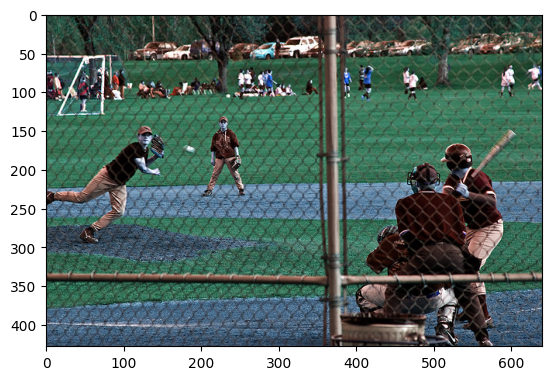

In [33]:
plt.imshow(img)